In [ ]:
%pip install pandas
%pip install scikit-learn
%pip install tensorflow
%pip install keras

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from keras.wrappers.scikitlearn import KerasRegressor
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import joblib

In [2]:
data = pd.read_csv('preprocessing/organized_data_encoded.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.columns
# data.drop(['locations_Jami Ul-Alfar Mosque'], axis = 1, inplace = True)
df = pd.DataFrame(data)
# df['stayTime'] = df['stayTime'].astype(np.float32)
# Separate features (X) and target variables (y)
X = df.drop([ 'stayTime','locations'], axis=1).values.astype(np.float32)
y = df[['stayTime']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
X_train.shape

(2906, 23)

In [3]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))

optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


C:\Users\MSii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 4796.3843 - val_accuracy: 0.0000e+00 - val_loss: 91.7213
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 95.3467 - val_accuracy: 0.0000e+00 - val_loss: 91.1116
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 93.6120 - val_accuracy: 0.0000e+00 - val_loss: 90.6846
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 94.9644 - val_accuracy: 0.0000e+00 - val_loss: 90.8418
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 98.4232 - val_accuracy: 0.0000e+00 - val_loss: 89.8973
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 97.3801 - val_accuracy: 0.0000e+00 - val_loss: 91.1768
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 95.8149 - val_accuracy: 0.0000e+00 - val_loss: 100.2693
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [4]:
# Predict on the test set
y_preds = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
y_preds = np.round(y_preds)
print(y_preds)
# y_preds = (y_pred > 0.5).astype(int)
print(y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 58.]
 [ 58.]
 [ 89.]
 [155.]
 [124.]
 [106.]
 [ 83.]
 [132.]
 [112.]
 [ 47.]
 [120.]
 [ 72.]
 [ 39.]
 [ 43.]
 [149.]
 [ 75.]
 [ 47.]
 [ 87.]
 [138.]
 [160.]
 [ 98.]
 [122.]
 [198.]
 [ 55.]
 [ 55.]
 [ 39.]
 [ 99.]
 [174.]
 [ 35.]
 [ 56.]
 [ 72.]
 [ 34.]
 [154.]
 [170.]
 [ 69.]
 [ 87.]
 [ 70.]
 [156.]
 [154.]
 [153.]
 [ 66.]
 [ 61.]
 [170.]
 [126.]
 [112.]
 [152.]
 [ 28.]
 [ 87.]
 [ 76.]
 [129.]
 [113.]
 [ 95.]
 [ 55.]
 [177.]
 [129.]
 [ 80.]
 [121.]
 [127.]
 [ 44.]
 [ 78.]
 [ 99.]
 [118.]
 [163.]
 [119.]
 [ 81.]
 [ 99.]
 [ 82.]
 [ 61.]
 [ 60.]
 [ 72.]
 [ 64.]
 [195.]
 [125.]
 [ 53.]
 [122.]
 [ 92.]
 [ 84.]
 [ 49.]
 [127.]
 [120.]
 [ 84.]
 [ 61.]
 [204.]
 [102.]
 [155.]
 [ 71.]
 [ 43.]
 [189.]
 [107.]
 [ 97.]
 [ 49.]
 [ 96.]
 [126.]
 [128.]
 [ 81.]
 [ 54.]
 [ 39.]
 [ 56.]
 [102.]
 [ 60.]
 [100.]
 [ 51.]
 [ 91.]
 [113.]
 [130.]
 [ 66.]
 [ 46.]
 [116.]
 [ 58.]
 [ 56.]
 [176.]
 [125.]
 [ 98.]
 [ 53.]
 [114.]
 [129.]
 [ 83.]
 [ 65.]
 [112.]
 [ 63.]
 

In [5]:
# Evaluate the model
mse_values = {column: mean_squared_error(y_test[column], y_preds[:, i]) for i, column in enumerate(y.columns)}
print(f'Mean Squared Errors: {mse_values}')

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')

Mean Squared Errors: {'stayTime': 90.41678129298487}
Mean Squared Error: 90.41678129298487
Mean Absolute Error: 7.649243466299862
R2 score: 0.9493861719545923


In [ ]:
joblib.dump(model, 'model.joblib')

In [ ]:
pickle.dump(model, open('pkmodel.pkl', 'wb'))

In [31]:
model.save("model.h5")


22

In [29]:
new_data = pd.read_csv('preprocessing/test_data_encoded.csv')
new_data.head(10)
len(new_data.columns)
model = load_model("model.h5")
new_data = new_data.astype(int)

new_preds = model.predict(new_data)
new_preds = np.round(new_preds)
print('Predictions:', new_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predictions: [[ 97.]
 [118.]
 [102.]]


In [ ]:

# Define the hyperparameters and their values to search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'neurons': [64, 128, 256]
}

# Create a pipeline with preprocessing steps (if needed) and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: standardize features
    ('regressor', KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_
best_model

In [ ]:
rawdata = pd.read_csv('preprocessing/organized_data.csv')

locations_of_interest = ['Independence Square', 'One Galle Face ', 'Lotus Tower']
filtered_data = rawdata[rawdata['locations'].isin(locations_of_interest)]
galle_face_green_data = rawdata[rawdata['locations'] == 'One Galle Face ']['stayTime']

stay_times = {}
for location in locations_of_interest:
    stay_times[location] = filtered_data[filtered_data['locations'] == location]['stayTime']

# Create a box plot to visualize the distribution of stay times for each location
plt.figure(figsize=(8, 6))
plt.boxplot(stay_times.values(), labels=stay_times.keys())
plt.title('Box Plot of Stay Times for Each Location')
plt.xlabel('Location')
plt.ylabel('Stay Time (minutes)')
plt.grid(True)
plt.show()

In [30]:
one_galle_face_data = rawdata[rawdata['locations'] == 'Lotus Tower']['stayTime']

# Create the histogram
plt.figure(figsize=(6, 4))
plt.hist(one_galle_face_data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Stay Times for One Galle Face')
plt.xlabel('Stay Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

NameError: name 'rawdata' is not defined

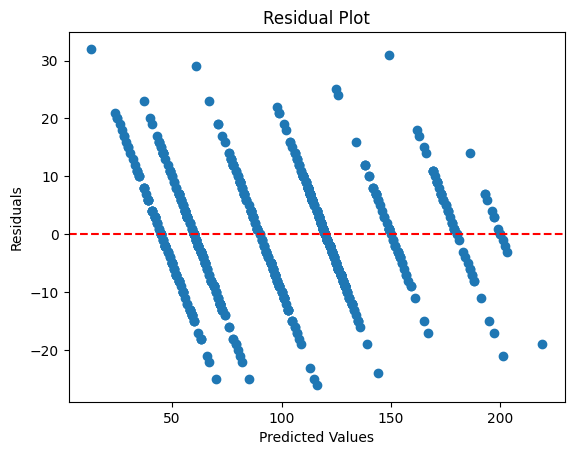

In [77]:
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

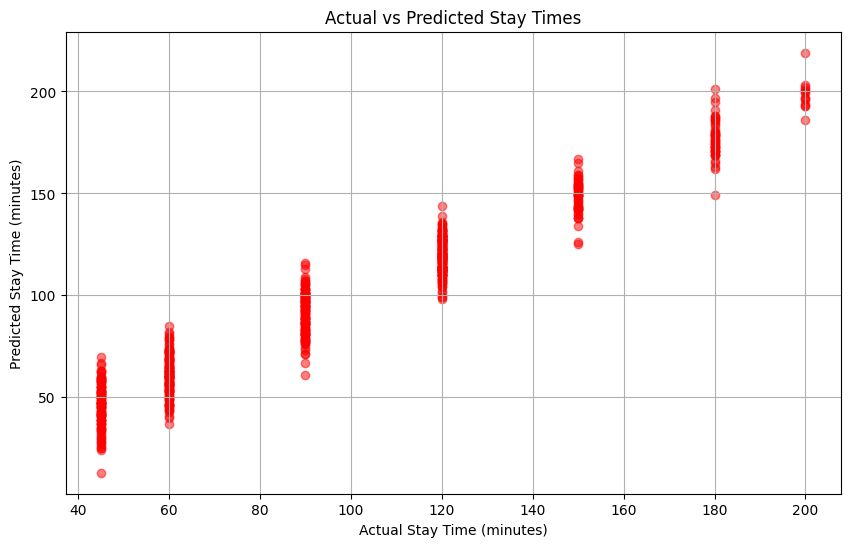

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.title('Actual vs Predicted Stay Times')
plt.xlabel('Actual Stay Time (minutes)')
plt.ylabel('Predicted Stay Time (minutes)')
plt.grid(True)
plt.show()

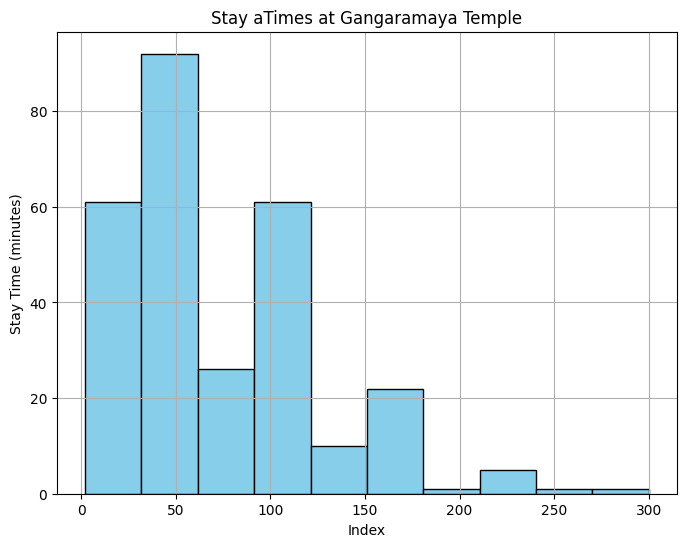

In [16]:
df2 = pd.read_csv('TripAdvisor_data_edited.csv')

plt.figure(figsize=(8, 6))
plt.hist(df2['Gangaramaya Temple'],  bins=10, color='skyblue', edgecolor='black')
plt.title('Stay aTimes at Gangaramaya Temple')
plt.xlabel('Index')
plt.ylabel('Stay Time (minutes)')
plt.grid(True)
plt.show()

In [17]:
import numpy as np

# Compute average stay time for each time of day
# average_stay_times = rawdata.groupby('locationType')['stayTime'].mean()
average_stay_time_one_galle_face = rawdata[rawdata['locationType'] == 'One Galle Face ']['stayTime'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(average_stay_time_one_galle_face.index, average_stay_time_one_galle_face.values, color='red')
plt.title('Location type vs Predicted Stay Times')
plt.xlabel('Actual Stay Time (minutes)')
plt.ylabel('Predicted Stay Time (minutes)')
plt.grid(True)
plt.show()

NameError: name 'rawdata' is not defined

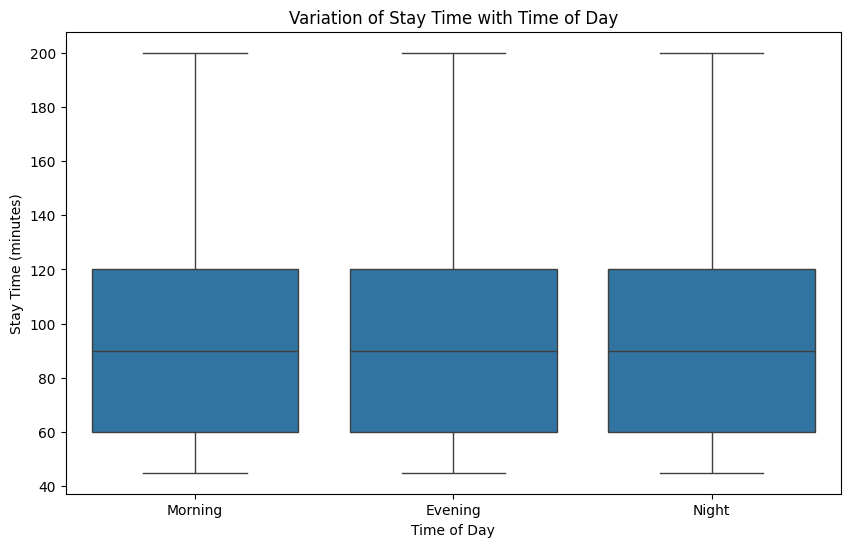

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='timeOfDay', y='stayTime', data=df)
plt.title('Variation of Stay Time with Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Stay Time (minutes)')
plt.show()

C:\Users\MSii\AppData\Local\Temp\ipykernel_7320\1284946945.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='locationType', y='stayTime', data=df, ci=None)


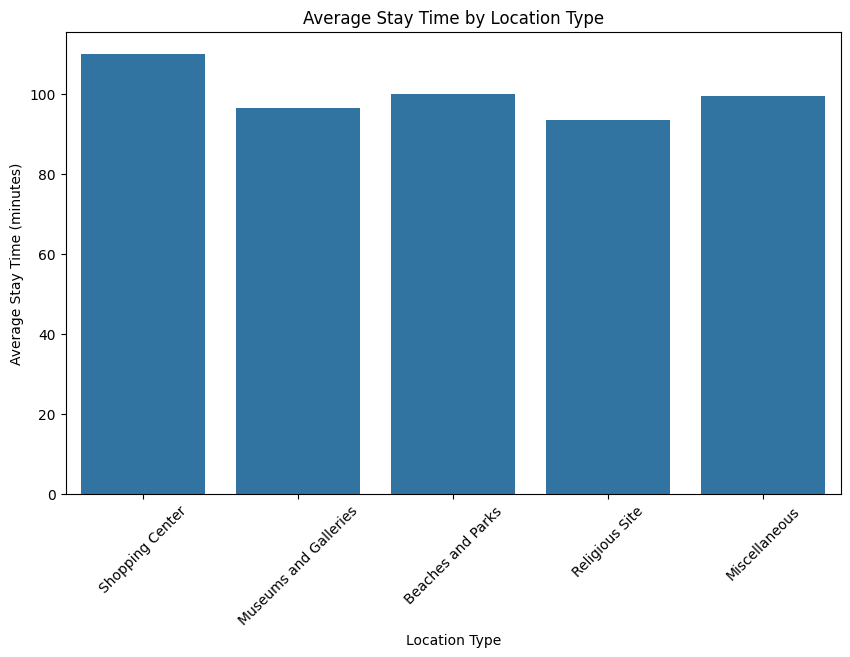

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='locationType', y='stayTime', data=df, ci=None)
plt.title('Average Stay Time by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Stay Time (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

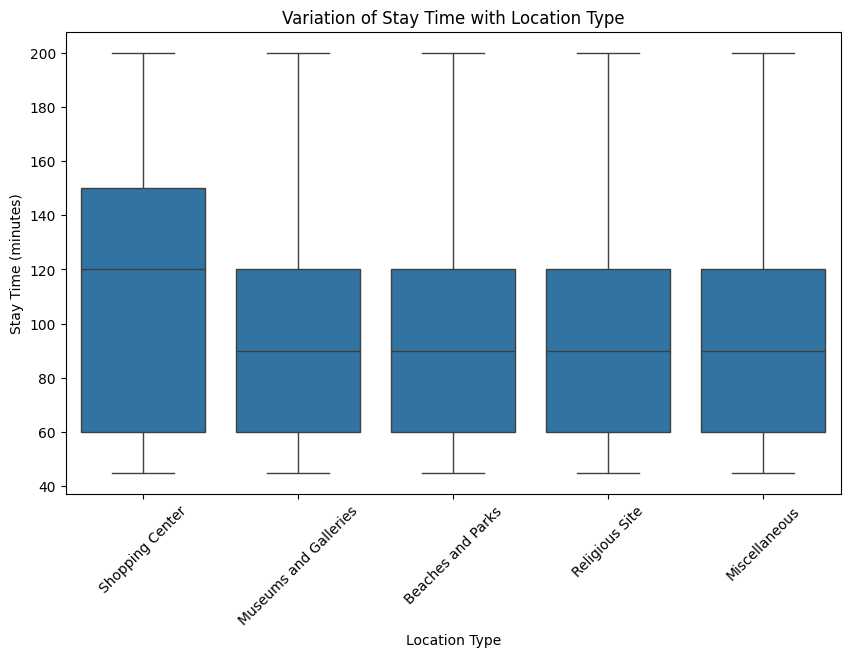

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='locationType', y='stayTime', data=df)
plt.title('Variation of Stay Time with Location Type')
plt.xlabel('Location Type')
plt.ylabel('Stay Time (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()